In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\train.csv")

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df.shape

(42000, 785)

In [8]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [9]:
X.shape

(42000, 784)

In [10]:
y.shape

(42000,)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.shape

(33600, 784)

In [14]:
X_test.shape

(8400, 784)

In [15]:
y_train.shape

(33600,)

In [16]:
y_test.shape

(8400,)

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
dt=DecisionTreeClassifier()

In [19]:
param_dict={'criterion':['gini','entropy','log_loss'],'max_depth':[1,2,3,4,5,6,7,8,None],'splitter':['best','random']}

In [20]:
grid=GridSearchCV(dt,param_grid=param_dict,n_jobs=-1,cv=10)

In [21]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
                         'splitter': ['best', 'random']})

In [22]:
grid.best_estimator_

DecisionTreeClassifier(criterion='log_loss')

In [23]:
grid.best_params_

{'criterion': 'log_loss', 'max_depth': None, 'splitter': 'best'}

In [25]:
grid.best_score_

0.8631547619047619

In [26]:
model=DecisionTreeClassifier(criterion='log_loss',splitter='best')

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss')

In [29]:
y_pred=model.predict(X_test)

In [30]:
a=accuracy_score(y_test,y_pred)

In [31]:
a

0.8646428571428572

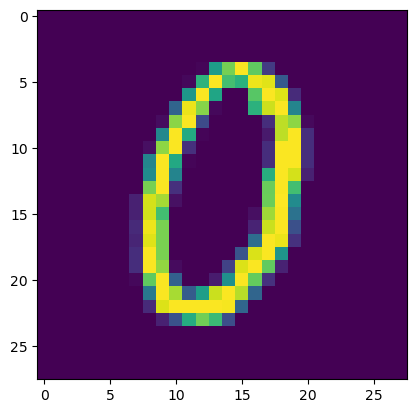

In [33]:
plt.imshow(df.iloc[5,1:].values.reshape(28,28))

In [39]:
model.predict(df.iloc[5,1:].values.reshape(1,-1))

array([0], dtype=int64)